# Covid-19 Pandemic Analysis on April 3rd

## Import Data
The dataset can be download at [Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset).

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import re
import math
%matplotlib inline

# Explore the data files
for dirname, _, filenames in os.walk('/Users/yuc/Data/novel-corona-virus-2019-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#os.listdir("/Users/yuc/Data/novel-corona-virus-2019-dataset")

/Users/yuc/Data/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/Users/yuc/Data/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/Users/yuc/Data/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/Users/yuc/Data/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/Users/yuc/Data/novel-corona-virus-2019-dataset/covid_19_data.csv
/Users/yuc/Data/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/Users/yuc/Data/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/Users/yuc/Data/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv


In [2]:
# Explore the covid-19 dataset
df = pd.read_csv("/Users/yuc/Data/novel-corona-virus-2019-dataset/covid_19_data.csv", parse_dates=["ObservationDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11614 entries, 0 to 11613
Data columns (total 8 columns):
SNo                11614 non-null int64
ObservationDate    11614 non-null datetime64[ns]
Province/State     6128 non-null object
Country/Region     11614 non-null object
Last Update        11614 non-null object
Confirmed          11614 non-null float64
Deaths             11614 non-null float64
Recovered          11614 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 726.0+ KB


In [3]:
# Country-level Data
countries = df.groupby(["ObservationDate", "Country/Region"])[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6062 entries, 0 to 6061
Data columns (total 5 columns):
ObservationDate    6062 non-null datetime64[ns]
Country/Region     6062 non-null object
Confirmed          6062 non-null float64
Deaths             6062 non-null float64
Recovered          6062 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 236.9+ KB


## Worldwide Pandemic 
### How bad is the world-wide covid-19 pandemic?

In [4]:
# World-level covid-19 data
world = df.groupby("ObservationDate")[["Confirmed", "Deaths", "Recovered"]].sum()
world.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


/Users/yuc/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


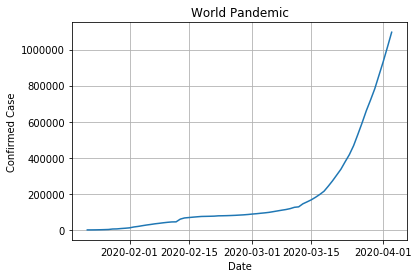

In [6]:
# Confirmed case plot
fig, ax = plt.subplots()
ax.plot(world.index, world["Confirmed"])
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed Case")
ax.set_title("World Pandemic")
#ax.set_yscale("log")
ax.grid()

plt.show()

### The pandemic peak is still not comming.
According to the [WHO phases of pandemic alert for H1N1](https://www.who.int/csr/disease/swineflu/phase/en/), the peak of pandemic is still not comming. The growth curve looks like an exponential increase.
### Is the growth of pandemic exponential?

In [5]:
# Simple Linear Regression for log-scale growth curve
X = np.array(range(world.shape[0])).reshape(-1, 1)
y = world["Confirmed"].apply(math.log)
lm = LinearRegression()
lm.fit(X, y)
y_pred = lm.predict(X)

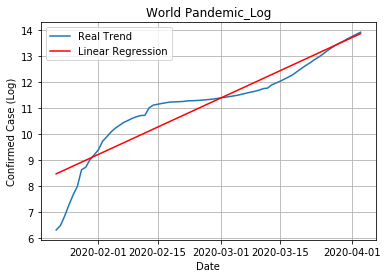

In [7]:
# Plot regression versus log-scale growth curve
fig, ax = plt.subplots()
ax.plot(world.index, world["Confirmed"].apply(math.log), label="Real Trend")
ax.plot(world.index, y_pred, color='r', label='Linear Regression')
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed Case (Log)")
ax.set_title("World Pandemic_Log")
#ax.set_yscale("log")
ax.grid()
ax.legend()

plt.show()

### The worldwide case increases exponentially and it can be simply predicted by Linear Regression on Log-scale. It is because linear regressive prediction is similar to the log-scale growth curve.
## Additional Data
Theoretically, we consider the population as an important factor for the pandmeic. Therefore, we found an additional population dataset from [Kaggle](https://www.kaggle.com/tanuprabhu/population-by-country-2020) to support our analysis.

In [8]:
# Load additional data
pop = pd.read_csv("/Users/yuc/Data/population_by_country_2020.csv")
# Uniform country names 
countries["Country"] = countries["Country/Region"].replace(
    ["Mainland China","US", "UK", "Macau"], ["China", "United States", "United Kingdom", "Macao"])
countries["Country"].value_counts().head(30)

South Korea             73
United States           73
Thailand                73
Taiwan                  73
Macao                   73
Hong Kong               73
Japan                   73
China                   73
Vietnam                 72
Singapore               72
France                  71
Australia               71
Malaysia                71
Nepal                   70
Canada                  69
Sri Lanka               68
Cambodia                68
Germany                 67
United Arab Emirates    66
Finland                 66
Philippines             66
India                   65
Russia                  64
Sweden                  64
Italy                   64
United Kingdom          64
Spain                   63
Belgium                 60
Egypt                   50
Others                  46
Name: Country, dtype: int64

We select the countries with more than 46-day records to analyze country-level Covid-19 pandemic because it was recorded as "others".

In [9]:
country_list = list(countries["Country"].value_counts().index[0:29])
country_list

['South Korea',
 'United States',
 'Thailand',
 'Taiwan',
 'Macao',
 'Hong Kong',
 'Japan',
 'China',
 'Vietnam',
 'Singapore',
 'France',
 'Australia',
 'Malaysia',
 'Nepal',
 'Canada',
 'Sri Lanka',
 'Cambodia',
 'Germany',
 'United Arab Emirates',
 'Finland',
 'Philippines',
 'India',
 'Russia',
 'Sweden',
 'Italy',
 'United Kingdom',
 'Spain',
 'Belgium',
 'Egypt']

In [10]:
# Select related features
country_pop = pop[pop["Country (or dependency)"].isin(country_list)].copy()
country_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 166
Data columns (total 11 columns):
Country (or dependency)    29 non-null object
Population (2020)          29 non-null int64
Yearly Change              29 non-null object
Net Change                 29 non-null int64
Density (P/Km²)            29 non-null int64
Land Area (Km²)            29 non-null int64
Migrants (net)             29 non-null float64
Fert. Rate                 29 non-null object
Med. Age                   29 non-null object
Urban Pop %                29 non-null object
World Share                29 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 2.7+ KB


In [11]:
# String transformation
country_pop = country_pop.drop(columns=["Yearly Change", "Net Change", "Fert. Rate"])
country_pop["World Share"] = country_pop["World Share"].str.strip("%").astype(float) / 100
country_pop["Urban Pop %"] = country_pop["Urban Pop %"].replace('N.A.', '100%')
country_pop["Urban Pop %"] = country_pop["Urban Pop %"].str.strip("%").astype(float) / 100
country_pop["Med. Age"] = country_pop["Med. Age"].astype(int)
country_pop.rename(columns={"Country (or dependency)": "Country"}, inplace=True)
country_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 166
Data columns (total 8 columns):
Country              29 non-null object
Population (2020)    29 non-null int64
Density (P/Km²)      29 non-null int64
Land Area (Km²)      29 non-null int64
Migrants (net)       29 non-null float64
Med. Age             29 non-null int64
Urban Pop %          29 non-null float64
World Share          29 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ KB


In [1]:
# Join Data
country_df = countries.merge(country_pop, how='inner', on = "Country")
country_df.info()

NameError: name 'countries' is not defined

In [13]:
country_df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Country,Population (2020),Density (P/Km²),Land Area (Km²),Migrants (net),Med. Age,Urban Pop %,World Share
0,2020-01-22,Hong Kong,0.0,0.0,0.0,Hong Kong,7496981,7140,1050,29308.0,45,1.0,0.001
1,2020-01-23,Hong Kong,2.0,0.0,0.0,Hong Kong,7496981,7140,1050,29308.0,45,1.0,0.001
2,2020-01-24,Hong Kong,2.0,0.0,0.0,Hong Kong,7496981,7140,1050,29308.0,45,1.0,0.001
3,2020-01-25,Hong Kong,5.0,0.0,0.0,Hong Kong,7496981,7140,1050,29308.0,45,1.0,0.001
4,2020-01-26,Hong Kong,8.0,0.0,0.0,Hong Kong,7496981,7140,1050,29308.0,45,1.0,0.001


In [14]:
# Scaling features to percentage 
country = country_df.drop(columns=["Country/Region", "Land Area (Km²)"]).copy()
country["Confirmed_Rate"] = country["Confirmed"] / country_df["Population (2020)"]
country["Death_Rate"] = country["Deaths"] / country_df["Population (2020)"]
country["Recover_Rate"] = country["Recovered"] / country_df["Population (2020)"]
country["Density"] = country["Density (P/Km²)"] / country_df["Population (2020)"]
country["Migrants"] = country["Migrants (net)"] / country_df["Population (2020)"]
country.drop(columns=["Density (P/Km²)", "Migrants (net)"], inplace=True)
country.head()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,Death_Rate,Recover_Rate,Density,Migrants
0,2020-01-22,0.0,0.0,0.0,Hong Kong,7496981,45,1.0,0.001,0.000000e+00,0.0,0.0,0.000952,0.003909
1,2020-01-23,2.0,0.0,0.0,Hong Kong,7496981,45,1.0,0.001,2.667741e-07,0.0,0.0,0.000952,0.003909
2,2020-01-24,2.0,0.0,0.0,Hong Kong,7496981,45,1.0,0.001,2.667741e-07,0.0,0.0,0.000952,0.003909
3,2020-01-25,5.0,0.0,0.0,Hong Kong,7496981,45,1.0,0.001,6.669351e-07,0.0,0.0,0.000952,0.003909
4,2020-01-26,8.0,0.0,0.0,Hong Kong,7496981,45,1.0,0.001,1.067096e-06,0.0,0.0,0.000952,0.003909


## EDA based on SIR Model: China, South Korea, US, and Italy
### China

In [24]:
cn = country[country["Country"] == 'China'].copy()
cn.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,Death_Rate,Recover_Rate,Density,Migrants
287,2020-03-30,81478.0,3304.0,75790.0,China,1439323776,38,0.61,0.1847,0.000057,0.000002,0.000053,1.062999e-07,-0.000242
288,2020-03-31,81524.0,3305.0,76068.0,China,1439323776,38,0.61,0.1847,0.000057,0.000002,0.000053,1.062999e-07,-0.000242
289,2020-04-01,81555.0,3312.0,76248.0,China,1439323776,38,0.61,0.1847,0.000057,0.000002,0.000053,1.062999e-07,-0.000242
290,2020-04-02,81589.0,3318.0,76408.0,China,1439323776,38,0.61,0.1847,0.000057,0.000002,0.000053,1.062999e-07,-0.000242
291,2020-04-03,81623.0,3322.0,76577.0,China,1439323776,38,0.61,0.1847,0.000057,0.000002,0.000053,1.062999e-07,-0.000242


In [28]:
# Scaling features to percentage
cn["DeathRate"] = cn["Deaths"] / cn["Confirmed"]
###'''
cn["RecoverRate"] = cn["Recovered"] / cn["Confirmed"]
cn["St"] = 1 - cn["Confirmed_Rate"]
cn["Rt"] = cn["Death_Rate"] + cn["Recover_Rate"]
cn["It"] = cn["Confirmed_Rate"] - cn["Rt"]
cn["Diff_Confirmed"] = cn["Confirmed_Rate"].diff(1)
cn["Diff_Rt"] = cn["Rt"].diff(1)
#cn = cn.drop(columns=["Country", "Deaths", "Recovered"])
cn = cn.fillna(0)
###'''
cn.head()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,...,Migrants,DeathRate,RecoverRate,St,Rt,It,Diff_Confirmed,Diff_Rt,Beta,Gamma
219,2020-01-22,547.0,17.0,28.0,China,1439323776,38,0.61,0.1847,3.800396e-07,...,-0.000242,0.031079,0.051188,1.000000,3.126468e-08,3.487749e-07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
220,2020-01-23,639.0,18.0,30.0,China,1439323776,38,0.61,0.1847,4.439585e-07,...,-0.000242,0.028169,0.046948,1.000000,3.334899e-08,4.106095e-07,6.391891e-08,2.084312e-09,0.143975,3.261834e-12
221,2020-01-24,916.0,26.0,36.0,China,1439323776,38,0.61,0.1847,6.364100e-07,...,-0.000242,0.028384,0.039301,0.999999,4.307578e-08,5.933342e-07,1.924515e-07,9.726790e-09,0.302402,1.061877e-11
222,2020-01-25,1399.0,42.0,39.0,China,1439323776,38,0.61,0.1847,9.719842e-07,...,-0.000242,0.030021,0.027877,0.999999,5.627643e-08,9.157078e-07,3.355743e-07,1.320064e-08,0.345247,9.435771e-12
223,2020-01-26,2062.0,56.0,49.0,China,1439323776,38,0.61,0.1847,1.432617e-06,...,-0.000242,0.027158,0.023763,0.999999,7.295092e-08,1.359666e-06,4.606330e-07,1.667450e-08,0.321533,8.086565e-12


In [29]:
# SIR parameter calculation
cn["Beta"] = cn["Diff_Confirmed"] / (cn["St"] * cn["It"])
cn["Gamma"] = cn["Diff_Rt"] / cn["It"]
cn.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,...,Migrants,DeathRate,RecoverRate,St,Rt,It,Diff_Confirmed,Diff_Rt,Beta,Gamma
287,2020-03-30,81478.0,3304.0,75790.0,China,1439323776,38,0.61,0.1847,0.000057,...,-0.000242,0.040551,0.930190,0.999943,0.000055,0.000002,2.362220e-08,2.320534e-07,0.014263,0.140101
288,2020-03-31,81524.0,3305.0,76068.0,China,1439323776,38,0.61,0.1847,0.000057,...,-0.000242,0.040540,0.933075,0.999943,0.000055,0.000001,3.195945e-08,1.938410e-07,0.021387,0.129707
289,2020-04-01,81555.0,3312.0,76248.0,China,1439323776,38,0.61,0.1847,0.000057,...,-0.000242,0.040611,0.934927,0.999943,0.000055,0.000001,2.153789e-08,1.299221e-07,0.015540,0.093734
290,2020-04-02,81589.0,3318.0,76408.0,China,1439323776,38,0.61,0.1847,0.000057,...,-0.000242,0.040667,0.936499,0.999943,0.000055,0.000001,2.362220e-08,1.153319e-07,0.018251,0.089104
291,2020-04-03,81623.0,3322.0,76577.0,China,1439323776,38,0.61,0.1847,0.000057,...,-0.000242,0.040699,0.938179,0.999943,0.000056,0.000001,2.362220e-08,1.201953e-07,0.019723,0.100348


### Is pandemic in China post-peak?

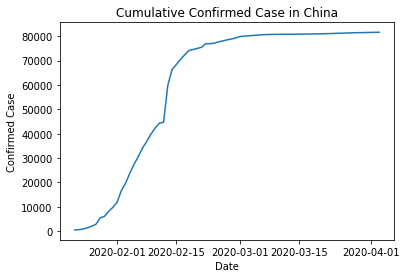

In [30]:
# Growth Plot
fig, ax = plt.subplots()
ax.plot(cn.ObservationDate, cn["Confirmed"])
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed Case")
ax.set_title("Cumulative Confirmed Case in China")

plt.show()

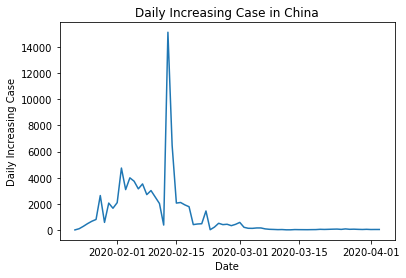

In [18]:
# Daily Increase
fig, ax = plt.subplots()
ax.plot(cn.ObservationDate, cn["Diff_Confirmed"])
ax.set_xlabel("Date")
ax.set_ylabel("Daily Increasing Case")
ax.set_title("Daily Increasing Case in China")

plt.show()

### The pandemic in China is post-peak because the growth seems stationary and daily increase decreases to stationary after peak. 

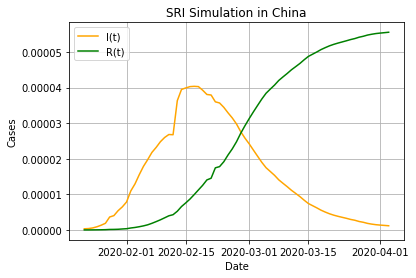

In [63]:
# SIR Plot
fig, ax = plt.subplots()
#ax.plot(cn.ObservationDate, cn["St"], color = 'b', label = 'S(t)')
ax.plot(cn.ObservationDate, cn["It"], color = 'orange', label = 'I(t)')
ax.plot(cn.ObservationDate, cn["Rt"], color = 'g', label = 'R(t)')
ax.set_xlabel("Date")
ax.set_ylabel("Cases")
ax.set_title("SRI Simulation in China")
#ax.set_yscale('log')
ax.grid()
ax.legend()

plt.show()

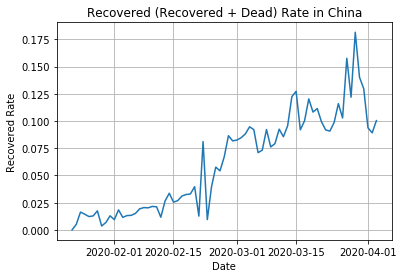

In [32]:
# Recovered Rate in SIR Model
fig, ax = plt.subplots()
ax.plot(cn.ObservationDate, cn["Gamma"])
ax.set_xlabel("Date")
ax.set_ylabel("Recovered Rate")
ax.set_title("Recovered (Recovered + Dead) Rate in China")
ax.grid()

plt.show()

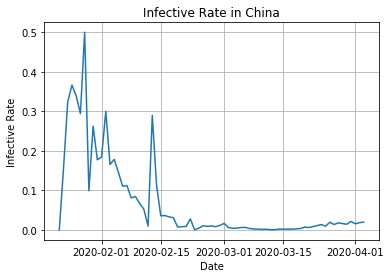

In [33]:
# Infective Rate in SIR Model
fig, ax = plt.subplots()
ax.plot(cn.ObservationDate, cn["Beta"])
ax.set_xlabel("Date")
ax.set_ylabel("Infective Rate")
ax.set_title("Infective Rate in China")
ax.grid()

plt.show()

### The SIR Model also demonstrates that pandemic in China is post-peak and becomes better. It is because the trend of recovery rate continues to increase and infective rate continue to decrease to stationary.

### South Korea
### Is pandemic in South Korea post-peak?

In [38]:
sk = country[country["Country"] == 'South Korea'].copy()
sk.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,Death_Rate,Recover_Rate,Density,Migrants
360,2020-03-30,9661.0,158.0,5228.0,South Korea,51269185,44,0.82,0.0066,0.000188,0.000003,0.000102,0.00001,0.000229
361,2020-03-31,9786.0,162.0,5408.0,South Korea,51269185,44,0.82,0.0066,0.000191,0.000003,0.000105,0.00001,0.000229
362,2020-04-01,9887.0,165.0,5567.0,South Korea,51269185,44,0.82,0.0066,0.000193,0.000003,0.000109,0.00001,0.000229
363,2020-04-02,9976.0,169.0,5828.0,South Korea,51269185,44,0.82,0.0066,0.000195,0.000003,0.000114,0.00001,0.000229
364,2020-04-03,10062.0,174.0,6021.0,South Korea,51269185,44,0.82,0.0066,0.000196,0.000003,0.000117,0.00001,0.000229


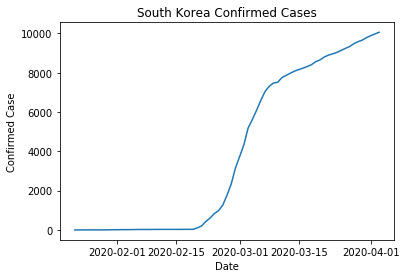

In [35]:
# Growth Plot
fig, ax = plt.subplots()
ax.plot(sk.ObservationDate, sk["Confirmed"])
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed Case")
ax.set_title("South Korea Confirmed Cases")
#ax.set_yscale("log")

plt.show()

### The growth plot shows pandemic seems to be post-peak.

In [39]:
# Scaling features to percentage
sk["DeathRate"] = sk["Deaths"] / sk["Confirmed"]
###'''
sk["RecoverRate"] = sk["Recovered"] / sk["Confirmed"]
sk["St"] = 1 - sk["Confirmed_Rate"]
sk["Rt"] = sk["Death_Rate"] + sk["Recover_Rate"]
sk["It"] = sk["Confirmed_Rate"] - sk["Rt"]
sk["Diff_Confirmed"] = sk["Confirmed_Rate"].diff(1)
sk["Diff_Rt"] = sk["Rt"].diff(1)
#sk = sk.drop(columns=["Deaths", "Recovered"])
sk = sk.fillna(0)
###'''
sk.head()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,...,Recover_Rate,Density,Migrants,DeathRate,RecoverRate,St,Rt,It,Diff_Confirmed,Diff_Rt
292,2020-01-22,1.0,0.0,0.0,South Korea,51269185,44,0.82,0.0066,1.950489e-08,...,0.0,0.00001,0.000229,0.0,0.0,1.0,0.0,1.950489e-08,0.000000e+00,0.0
293,2020-01-23,1.0,0.0,0.0,South Korea,51269185,44,0.82,0.0066,1.950489e-08,...,0.0,0.00001,0.000229,0.0,0.0,1.0,0.0,1.950489e-08,0.000000e+00,0.0
294,2020-01-24,2.0,0.0,0.0,South Korea,51269185,44,0.82,0.0066,3.900979e-08,...,0.0,0.00001,0.000229,0.0,0.0,1.0,0.0,3.900979e-08,1.950489e-08,0.0
295,2020-01-25,2.0,0.0,0.0,South Korea,51269185,44,0.82,0.0066,3.900979e-08,...,0.0,0.00001,0.000229,0.0,0.0,1.0,0.0,3.900979e-08,0.000000e+00,0.0
296,2020-01-26,3.0,0.0,0.0,South Korea,51269185,44,0.82,0.0066,5.851468e-08,...,0.0,0.00001,0.000229,0.0,0.0,1.0,0.0,5.851468e-08,1.950489e-08,0.0


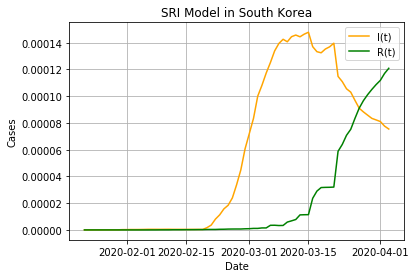

In [40]:
# SIR Model
fig, ax = plt.subplots()
#ax.plot(sk.ObservationDate, sk["St"], color = 'b', label = 'S(t)')
ax.plot(sk.ObservationDate, sk["It"], color = 'orange', label = 'I(t)')
ax.plot(sk.ObservationDate, sk["Rt"], color = 'g', label = 'R(t)')
ax.set_xlabel("Date")
ax.set_ylabel("Cases")
ax.set_title("SRI Model in South Korea")
#ax.set_yscale('log')
ax.grid()
ax.legend()

plt.show()

### The SIR model shows pandemic in South Korea is close to post-peak.

In [45]:
# SIR Model Parameter Calculation
sk["Beta"] = sk["Diff_Confirmed"] / (sk["St"] * sk["It"])
sk["Gamma"] = sk["Diff_Rt"] / sk["It"]

In [46]:
sk.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,...,Migrants,DeathRate,RecoverRate,St,Rt,It,Diff_Confirmed,Diff_Rt,Beta,Gamma
360,2020-03-30,9661.0,158.0,5228.0,South Korea,51269185,44,0.82,0.0066,0.000188,...,0.000229,0.016354,0.541145,0.999812,0.000105,0.000083,0.000002,0.000004,0.018249,0.047018
361,2020-03-31,9786.0,162.0,5408.0,South Korea,51269185,44,0.82,0.0066,0.000191,...,0.000229,0.016554,0.552626,0.999809,0.000109,0.000082,0.000002,0.000004,0.029655,0.043643
362,2020-04-01,9887.0,165.0,5567.0,South Korea,51269185,44,0.82,0.0066,0.000193,...,0.000229,0.016689,0.563063,0.999807,0.000112,0.000081,0.000002,0.000003,0.024313,0.038989
363,2020-04-02,9976.0,169.0,5828.0,South Korea,51269185,44,0.82,0.0066,0.000195,...,0.000229,0.016941,0.584202,0.999805,0.000117,0.000078,0.000002,0.000005,0.022372,0.066600
364,2020-04-03,10062.0,174.0,6021.0,South Korea,51269185,44,0.82,0.0066,0.000196,...,0.000229,0.017293,0.598390,0.999804,0.000121,0.000075,0.000002,0.000004,0.022244,0.051202


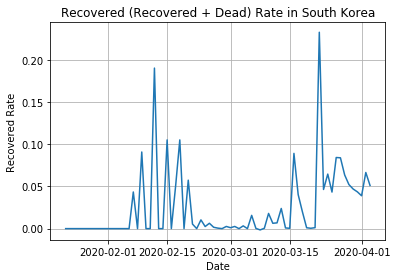

In [47]:
# Recovery Rate in SIR Model
fig, ax = plt.subplots()
ax.plot(sk.ObservationDate, sk["Gamma"])
ax.set_xlabel("Date")
ax.set_ylabel("Recovered Rate")
ax.set_title("Recovered (Recovered + Dead) Rate in South Korea")
ax.grid()

plt.show()

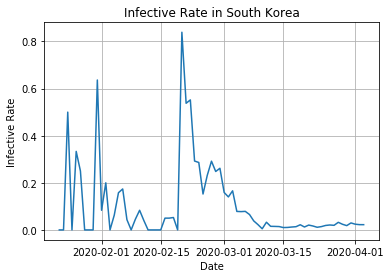

In [48]:
# Infective Rate in SIR Model
fig, ax = plt.subplots()
ax.plot(sk.ObservationDate, sk["Beta"])
ax.set_xlabel("Date")
ax.set_ylabel("Infective Rate")
ax.grid()
ax.set_title("Infective Rate in South Korea")

plt.show()

### The infective rate decreases to stationary but fluctuant trend of recovery rate shows that pandemic in South Korea is not 100% post-peak.

- The infective rate beta of Covid-19 in both China and South Korea are stationary.
- Beta in China is around **1%**.
- Beta in South Korea is around **2%**.
### We can conclude that both bountries have controled pandemic of covid-19 successfully.

### US
### Is pandemic in US post-peak?

In [58]:
us = country[country["Country"] == 'United States'].copy()
us.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,Death_Rate,Recover_Rate,Density,Migrants
579,2020-03-30,161807.0,2978.0,5644.0,United States,331002651,38,0.83,0.0425,0.000489,0.000009,0.000017,1.087605e-07,0.002885
580,2020-03-31,188172.0,3873.0,7024.0,United States,331002651,38,0.83,0.0425,0.000568,0.000012,0.000021,1.087605e-07,0.002885
581,2020-04-01,213372.0,4757.0,8474.0,United States,331002651,38,0.83,0.0425,0.000645,0.000014,0.000026,1.087605e-07,0.002885
582,2020-04-02,243453.0,5926.0,9001.0,United States,331002651,38,0.83,0.0425,0.000736,0.000018,0.000027,1.087605e-07,0.002885
583,2020-04-03,275586.0,7087.0,9707.0,United States,331002651,38,0.83,0.0425,0.000833,0.000021,0.000029,1.087605e-07,0.002885


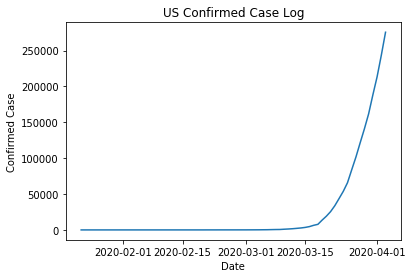

In [51]:
# Growth Plot
fig, ax = plt.subplots()
ax.plot(us.ObservationDate, us["Confirmed"])
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed Case")
ax.set_title("US Confirmed Case Log")
#ax.set_yscale("log")

plt.show()

In [59]:
# Scaling features to percentage
us["DeathRate"] = us["Deaths"] / us["Confirmed"]
###'''
us["RecoverRate"] = us["Recovered"] / us["Confirmed"]
us["St"] = 1 - us["Confirmed_Rate"]
us["Rt"] = us["Death_Rate"] + us["Recover_Rate"]
us["It"] = us["Confirmed_Rate"] - us["Rt"]
us["Diff_Confirmed"] = us["Confirmed_Rate"].diff(1)
us["Diff_Rt"] = us["Rt"].diff(1)
#sk = sk.drop(columns=["Deaths", "Recovered"])
us = us.fillna(0)
###'''
us["Beta"] = us["Diff_Confirmed"] / (us["St"] * us["It"])
us["Gamma"] = us["Diff_Rt"] / us["It"]
us.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,...,Migrants,DeathRate,RecoverRate,St,Rt,It,Diff_Confirmed,Diff_Rt,Beta,Gamma
579,2020-03-30,161807.0,2978.0,5644.0,United States,331002651,38,0.83,0.0425,0.000489,...,0.002885,0.018405,0.034881,0.999511,0.000026,0.000463,0.000063,0.000011,0.136640,0.022783
580,2020-03-31,188172.0,3873.0,7024.0,United States,331002651,38,0.83,0.0425,0.000568,...,0.002885,0.020582,0.037328,0.999432,0.000033,0.000536,0.000080,0.000007,0.148808,0.012833
581,2020-04-01,213372.0,4757.0,8474.0,United States,331002651,38,0.83,0.0425,0.000645,...,0.002885,0.022294,0.039715,0.999355,0.000040,0.000605,0.000076,0.000007,0.125992,0.011662
582,2020-04-02,243453.0,5926.0,9001.0,United States,331002651,38,0.83,0.0425,0.000736,...,0.002885,0.024341,0.036972,0.999264,0.000045,0.000690,0.000091,0.000005,0.131727,0.007421
583,2020-04-03,275586.0,7087.0,9707.0,United States,331002651,38,0.83,0.0425,0.000833,...,0.002885,0.025716,0.035223,0.999167,0.000051,0.000782,0.000097,0.000006,0.124269,0.007214


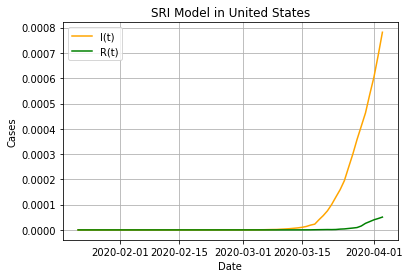

In [60]:
# SIR Model
fig, ax = plt.subplots()
#ax.plot(sk.ObservationDate, sk["St"], color = 'b', label = 'S(t)')
ax.plot(us.ObservationDate, us["It"], color = 'orange', label = 'I(t)')
ax.plot(us.ObservationDate, us["Rt"], color = 'g', label = 'R(t)')
ax.set_xlabel("Date")
ax.set_ylabel("Cases")
ax.set_title("SRI Model in United States")
#ax.set_yscale('log')
ax.grid()
ax.legend()

plt.show()

### Obviously, pandemic in US is serious and  not post-peak.
### Italy
### Is pandemic in Italy post-peak?

In [54]:
ita = country[country["Country"] == 'Italy'].copy()
ita.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,Death_Rate,Recover_Rate,Density,Migrants
1605,2020-03-30,101739.0,11591.0,14620.0,Italy,60461826,47,0.69,0.0078,0.001683,0.000192,0.000242,0.000003,0.002463
1606,2020-03-31,105792.0,12428.0,15729.0,Italy,60461826,47,0.69,0.0078,0.001750,0.000206,0.000260,0.000003,0.002463
1607,2020-04-01,110574.0,13155.0,16847.0,Italy,60461826,47,0.69,0.0078,0.001829,0.000218,0.000279,0.000003,0.002463
1608,2020-04-02,115242.0,13915.0,18278.0,Italy,60461826,47,0.69,0.0078,0.001906,0.000230,0.000302,0.000003,0.002463
1609,2020-04-03,119827.0,14681.0,19758.0,Italy,60461826,47,0.69,0.0078,0.001982,0.000243,0.000327,0.000003,0.002463


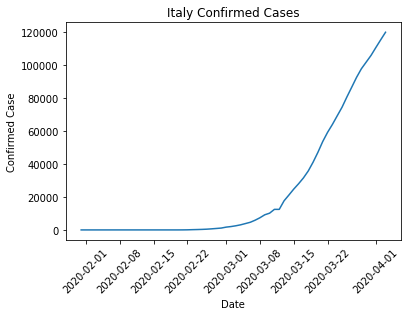

In [55]:
# Growth Plot
fig, ax = plt.subplots()
ax.plot(ita.ObservationDate, ita["Confirmed"])
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed Case")
ax.set_title("Italy Confirmed Cases")
#ax.set_yscale("log")
plt.xticks(rotation=45)

plt.show()

In [61]:
# Scaling features to percentage
ita["DeathRate"] = ita["Deaths"] / ita["Confirmed"]
###'''
ita["RecoverRate"] = ita["Recovered"] / ita["Confirmed"]
ita["St"] = 1 - ita["Confirmed_Rate"]
ita["Rt"] = ita["Death_Rate"] + ita["Recover_Rate"]
ita["It"] = ita["Confirmed_Rate"] - ita["Rt"]
ita["Diff_Confirmed"] = ita["Confirmed_Rate"].diff(1)
ita["Diff_Rt"] = ita["Rt"].diff(1)
#sk = sk.drop(columns=["Deaths", "Recovered"])
ita = ita.fillna(0)
###'''
ita["Beta"] = ita["Diff_Confirmed"] / (ita["St"] * ita["It"])
ita["Gamma"] = ita["Diff_Rt"] / ita["It"]
ita.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Country,Population (2020),Med. Age,Urban Pop %,World Share,Confirmed_Rate,...,Migrants,DeathRate,RecoverRate,St,Rt,It,Diff_Confirmed,Diff_Rt,Beta,Gamma
1605,2020-03-30,101739.0,11591.0,14620.0,Italy,60461826,47,0.69,0.0078,0.001683,...,0.002463,0.113929,0.143701,0.998317,0.000434,0.001249,0.000067,0.000040,0.053713,0.031803
1606,2020-03-31,105792.0,12428.0,15729.0,Italy,60461826,47,0.69,0.0078,0.001750,...,0.002463,0.117476,0.148679,0.998250,0.000466,0.001284,0.000067,0.000032,0.052297,0.025066
1607,2020-04-01,110574.0,13155.0,16847.0,Italy,60461826,47,0.69,0.0078,0.001829,...,0.002463,0.118970,0.152360,0.998171,0.000496,0.001333,0.000079,0.000031,0.059459,0.022899
1608,2020-04-02,115242.0,13915.0,18278.0,Italy,60461826,47,0.69,0.0078,0.001906,...,0.002463,0.120746,0.158605,0.998094,0.000532,0.001374,0.000077,0.000036,0.056315,0.026382
1609,2020-04-03,119827.0,14681.0,19758.0,Italy,60461826,47,0.69,0.0078,0.001982,...,0.002463,0.122518,0.164888,0.998018,0.000570,0.001412,0.000076,0.000037,0.053803,0.026303


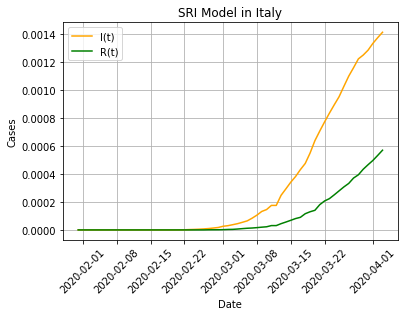

In [69]:
# SIR Modelw
fig, ax = plt.subplots()
#ax.plot(sk.ObservationDate, sk["St"], color = 'b', label = 'S(t)')
ax.plot(ita.ObservationDate, ita["It"], color = 'orange', label = 'I(t)')
ax.plot(ita.ObservationDate, ita["Rt"], color = 'g', label = 'R(t)')
ax.set_xlabel("Date")
ax.set_ylabel("Cases")
ax.set_title("SRI Model in Italy")
#ax.set_yscale('log')
ax.grid()
ax.legend()
plt.xticks(rotation=45)

plt.show()

### Obviously, pandemic in US is serious and  not post-peak.
- Both Italy and U.S are suffering from the explosion of covid-19 pandemic.
- The condition in Italy looks even better with a high death rate.

### Is the dataset trustful? Yes. The analysis on these 4 countries accords with their situation.

## Baseline Model
### Is population density an important factor impact pandemic?

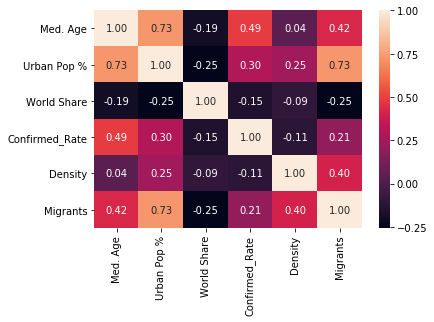

In [92]:
# Correlation Heatmap
cluster_df = country[country["ObservationDate"] == '2020-04-03']
cluster_df.drop(columns=["Confirmed", "Deaths", "Recovered", "Population (2020)",
                        "Death_Rate", "Recover_Rate"], inplace=True)
sns.heatmap(cluster_df.corr(), annot=True, fmt=".2f")

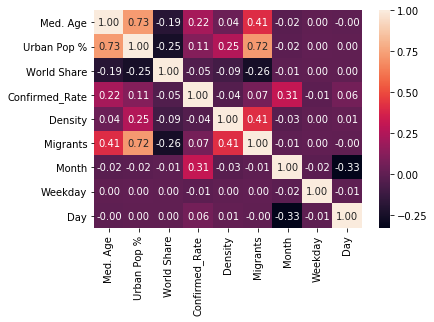

In [137]:
# Correlation Heatmap
cluster_df = country.copy()
cluster_df["Month"] = cluster_df["ObservationDate"].map(lambda x: x.month)
cluster_df["Weekday"] = cluster_df["ObservationDate"].map(lambda x: x.dayofweek)
cluster_df["Day"] = cluster_df["ObservationDate"].map(lambda x: x.day)
cluster_df.drop(columns=["Confirmed", "Deaths", "Recovered", "Population (2020)",
                        "Death_Rate", "Recover_Rate"], inplace=True)
sns.heatmap(cluster_df.corr(), annot=True, fmt=".2f")

In [138]:
# Linear Regression Model
X = cluster_df.drop(columns=["ObservationDate", "Country", "Confirmed_Rate"])
y = (cluster_df["Confirmed_Rate"] + 0.0000000001).apply(math.log)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
y_pred = lm_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print("R2:", lm_model.score(X_test, y_test))
print("RMSE:", rmse)

R2: 0.6780477335358512
RMSE: 3.3371198703351648


In [144]:
# Feature Importance
imp = pd.DataFrame(lm_model.coef_, columns=["Importance"])
imp.index = X.columns
imp

,Importance
Med. Age,0.095887
Urban Pop %,3.768394
World Share,2.714810
Density,60.993863
Migrants,-23.615502
Month,3.249720
Weekday,0.009237
Day,0.114959


### Population density is the most signficant factor to impact pandemic.
We found population density, urban population rate, world share and month are positively significant to confirmed case rate in country level. In addition, net migrant rate is negatively important to confirmed case rate in country level.